In [13]:
# === 📦 Import library yang dibutuhkan ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [14]:
# === 📂 Membaca dataset ===
df = pd.read_csv("data/upsample.csv")

# === 1️⃣ Informasi umum dataset ===
print("=== 📊 Informasi Umum Dataset ===\n")
display(HTML(f"<b>Jumlah baris:</b> {df.shape[0]} | <b>Jumlah kolom:</b> {df.shape[1]}"))

# === Melihat 5 data teratas ===
display(HTML("<h4>🔹 Contoh 5 data teratas:</h4>"))
display(df.head())

=== 📊 Informasi Umum Dataset ===



,x,y,z,bvp,eda,hr,LABEL
0,15.0,18.0,59.0,9.70,0.566581,98.0,0
1,15.0,18.0,59.0,9.15,0.566581,98.0,0
2,15.0,17.0,59.0,8.00,0.566581,98.0,0
3,15.0,17.0,59.0,6.26,0.566581,98.0,0
4,16.0,18.0,60.0,4.11,0.566581,98.0,0


In [15]:
# === 2️⃣ Informasi tipe data dan missing values ===
info_df = pd.DataFrame({
    "Kolom": df.columns,
    "Tipe Data": df.dtypes.values,
    "Jumlah Null": df.isnull().sum().values,
    "Persentase Null (%)": (df.isnull().mean() * 100).round(2)
})
display(HTML("<h4>📋 Info Kolom:</h4>"))
display(info_df.style.background_gradient(cmap="Blues").hide(axis="index"))

Kolom,Tipe Data,Jumlah Null,Persentase Null (%)
x,float64,0,0.000000
y,float64,0,0.000000
z,float64,0,0.000000
bvp,float64,0,0.000000
eda,float64,0,0.000000
hr,float64,0,0.000000
LABEL,int64,0,0.000000


In [16]:

# === 3️⃣ Statistik deskriptif numerik ===
display(HTML("<h4>📈 Statistik Deskriptif:</h4>"))
display(df.describe().T.style.background_gradient(cmap="Purples").format("{:.3f}"))

,count,mean,std,min,25%,50%,75%,max
x,1620978.000,16.149,36.952,-128.000,-10.000,25.000,43.000,127.000
y,1620978.000,-0.540,23.050,-128.000,-14.000,-5.000,11.000,127.000
z,1620978.000,38.840,24.463,-128.000,27.000,47.000,57.000,127.000
bvp,1620978.000,0.010,74.702,-2649.000,-13.530,0.340,13.350,2641.500
eda,1620978.000,2.421,3.288,0.000,0.318,0.903,3.741,19.707
hr,1620978.000,88.161,13.748,0.000,78.920,87.120,95.400,138.400
LABEL,1620978.000,0.475,0.533,0.000,0.000,0.000,1.000,2.000


C:\Users\risqi\AppData\Local\Temp\ipykernel_33164\216755973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LABEL", data=df, palette="coolwarm")


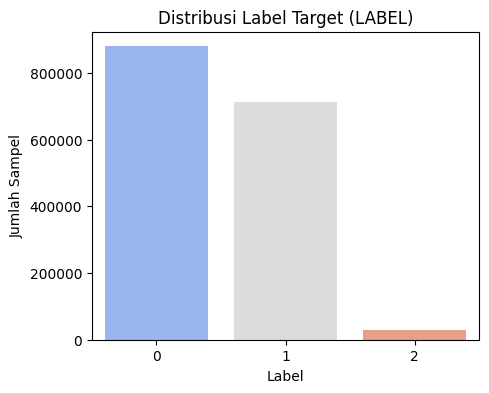


=== 🎯 Distribusi Nilai LABEL ===


,Proporsi
LABEL,
0,0.542723
1,0.440040
2,0.017237


In [17]:
# === 4️⃣ Distribusi target (LABEL) ===
if "LABEL" in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="LABEL", data=df, palette="coolwarm")
    plt.title("Distribusi Label Target (LABEL)")
    plt.xlabel("Label")
    plt.ylabel("Jumlah Sampel")
    plt.show()

    print("\n=== 🎯 Distribusi Nilai LABEL ===")
    display(df["LABEL"].value_counts(normalize=True).to_frame("Proporsi").style.bar(color='orange'))
else:
    print("⚠️ Kolom target 'LABEL' tidak ditemukan di dataset.")


=== 🧹 Membersihkan Dataset ===

🔍 Jumlah Missing Values per Kolom:
Series([], dtype: int64)


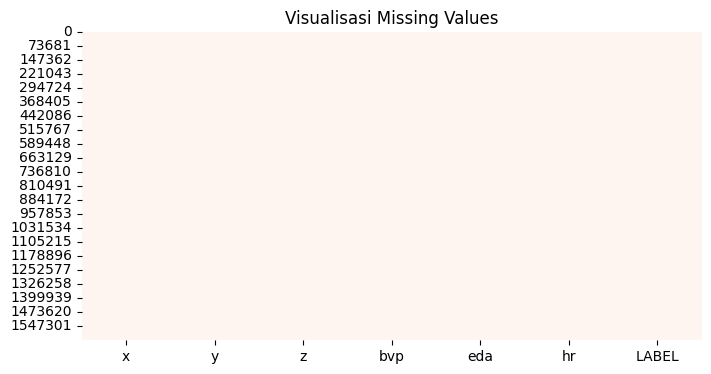

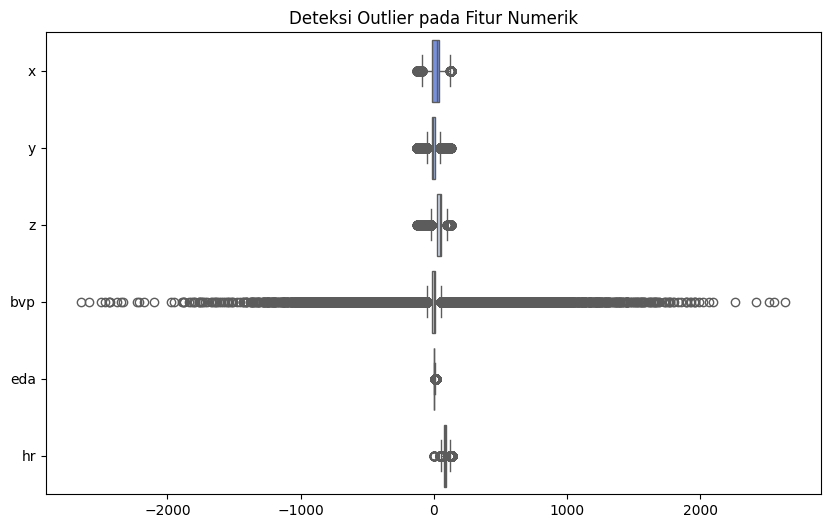

In [18]:
# === 🧹 Langkah 2: Membersihkan Dataset ===

print("=== 🧹 Membersihkan Dataset ===")

# === 1️⃣ Mengecek missing values ===
missing_values = df.isnull().sum()
print("\n🔍 Jumlah Missing Values per Kolom:")
print(missing_values[missing_values > 0])

# Visualisasi missing values
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Visualisasi Missing Values")
plt.show()

# === 3️⃣ Mengecek nilai outlier (menggunakan boxplot) ===
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["LABEL"]), orient="h", palette="coolwarm")
plt.title("Deteksi Outlier pada Fitur Numerik")
plt.show()

In [19]:
# Jika ada missing values, hapus atau isi dengan median/mean
if missing_values.sum() > 0:
    df = df.fillna(df.median(numeric_only=True))
    print("\n✅ Missing values telah diisi dengan nilai median tiap kolom.")
else:
    print("\n✅ Tidak ditemukan missing values.")


✅ Tidak ditemukan missing values.


In [20]:
# === 2️⃣ Mengecek duplikasi data ===
duplicate_rows = df[df.duplicated()]
print(f"\n🔍 Jumlah data duplikat: {duplicate_rows.shape[0]}")

if duplicate_rows.shape[0] > 0:
    df = df.drop_duplicates()
    print("✅ Data duplikat telah dihapus.")
else:
    print("✅ Tidak ada data duplikat.")


🔍 Jumlah data duplikat: 3557
✅ Data duplikat telah dihapus.


In [21]:
# === 4️⃣ Deteksi outlier menggunakan IQR (Interquartile Range) ===
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

print("\n🔍 Jumlah total outlier per kolom:")
print(outlier_mask.sum())

# (Opsional) Hapus outlier ekstrem — disarankan jika data sangat noise
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"\n✅ Dataset setelah pembersihan outlier: {df_cleaned.shape[0]} baris tersisa.")


🔍 Jumlah total outlier per kolom:
x           520
y        108667
z         59480
bvp      249113
eda       78265
hr        25242
LABEL         0
dtype: int64

✅ Dataset setelah pembersihan outlier: 1160710 baris tersisa.


In [22]:
# === 5️⃣ Menampilkan ringkasan akhir ===
print("\n=== ✅ Ringkasan Pembersihan ===")
display(pd.DataFrame({
    "Total Awal": [df.shape[0]],
    "Setelah Hapus Outlier": [df_cleaned.shape[0]],
    "Jumlah Kolom": [df.shape[1]],
}))

# Simpan dataset bersih (opsional)
df_cleaned.to_csv("data/cleaned_upsample.csv", index=False)
print("\n💾 Dataset bersih telah disimpan ke data/cleaned_upsample.csv")


=== ✅ Ringkasan Pembersihan ===


,Total Awal,Setelah Hapus Outlier,Jumlah Kolom
0,1617421,1160710,7



💾 Dataset bersih telah disimpan ke data/cleaned_upsample.csv


In [23]:
# === 🔗 Langkah 3: Mengidentifikasi Variabel yang Berkorelasi ===

print("=== 🔗 Analisis Korelasi antar Variabel ===")

# Gunakan data bersih
df_corr = df_cleaned.copy()

# === 1️⃣ Hitung matriks korelasi ===
corr_matrix = df_corr.corr(numeric_only=True)

=== 🔗 Analisis Korelasi antar Variabel ===


In [24]:
# === 2️⃣ Tampilkan matriks korelasi (angka) ===
display(corr_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))

,x,y,z,bvp,eda,hr,LABEL
x,1.00,-0.07,-0.32,-0.03,-0.02,0.09,0.18
y,-0.07,1.00,-0.07,0.01,-0.08,0.25,0.04
z,-0.32,-0.07,1.00,-0.02,0.06,0.00,-0.04
bvp,-0.03,0.01,-0.02,1.00,-0.01,-0.00,-0.01
eda,-0.02,-0.08,0.06,-0.01,1.00,-0.07,-0.20
hr,0.09,0.25,0.00,-0.00,-0.07,1.00,0.04
LABEL,0.18,0.04,-0.04,-0.01,-0.20,0.04,1.00


c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


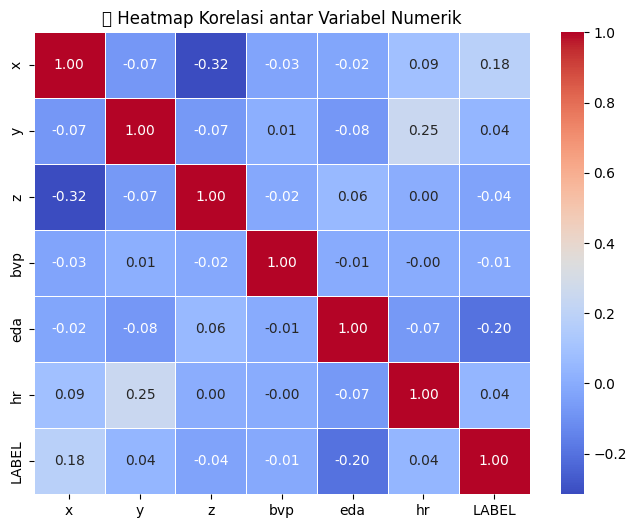

In [25]:
# === 3️⃣ Visualisasi heatmap korelasi ===
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔍 Heatmap Korelasi antar Variabel Numerik", fontsize=12)
plt.show()

C:\Users\risqi\AppData\Local\Temp\ipykernel_33164\2524171183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target_sorted.values, y=corr_target_sorted.index, palette="viridis")
c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


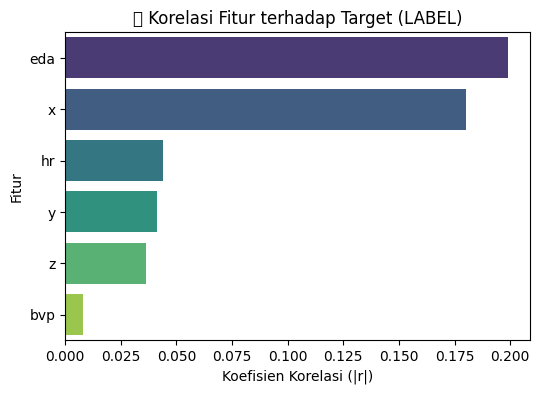


=== 🔍 Top 3 Fitur dengan Korelasi Tertinggi terhadap LABEL ===


,Korelasi
eda,0.199090
x,0.180067
hr,0.044024


In [26]:
# === 4️⃣ Korelasi tiap fitur terhadap target LABEL ===
if "LABEL" in df_corr.columns:
    corr_target = corr_matrix["LABEL"].drop("LABEL")
    corr_target_sorted = corr_target.abs().sort_values(ascending=False)

    plt.figure(figsize=(6,4))
    sns.barplot(x=corr_target_sorted.values, y=corr_target_sorted.index, palette="viridis")
    plt.title("📈 Korelasi Fitur terhadap Target (LABEL)")
    plt.xlabel("Koefisien Korelasi (|r|)")
    plt.ylabel("Fitur")
    plt.show()

    print("\n=== 🔍 Top 3 Fitur dengan Korelasi Tertinggi terhadap LABEL ===")
    display(corr_target_sorted.head(3).to_frame("Korelasi"))
else:
    print("⚠️ Kolom 'LABEL' tidak ditemukan di dataset untuk analisis korelasi target.")

c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


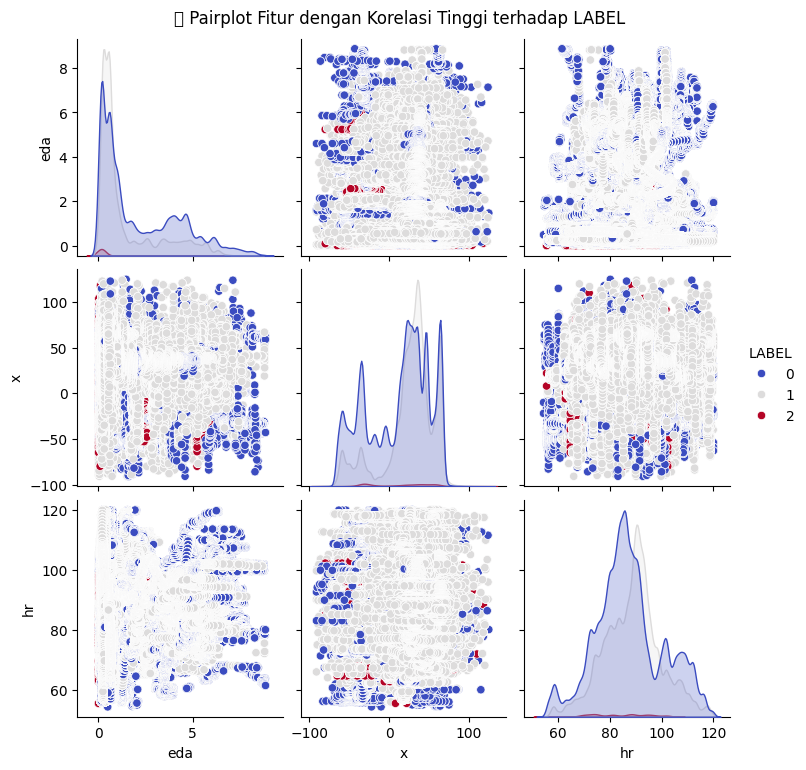

In [27]:

# === 5️⃣ (Opsional) Pairplot untuk hubungan antar fitur penting ===
important_features = corr_target_sorted.head(3).index.tolist() if "LABEL" in df_corr.columns else df_corr.columns[:3]
sns.pairplot(df_corr, vars=important_features, hue="LABEL", diag_kind="kde", palette="coolwarm")
plt.suptitle("🔍 Pairplot Fitur dengan Korelasi Tinggi terhadap LABEL", y=1.02)
plt.show()

In [29]:
# Identifikasi tipe data
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

print("🔢 Fitur numerik:\n", list(numerical_features))
print("\n🔠 Fitur kategorikal:\n", list(categorical_features))


🔢 Fitur numerik:
 ['x', 'y', 'z', 'bvp', 'eda', 'hr', 'LABEL']

🔠 Fitur kategorikal:
 []


In [30]:
# Statistik deskriptif fitur numerik
desc_stats = df_cleaned[numerical_features].describe().T
desc_stats["skewness"] = df_cleaned[numerical_features].skew()
desc_stats["kurtosis"] = df_cleaned[numerical_features].kurtosis()
desc_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
x,1160710.0,17.413892,36.566453,-91.00,-4.000000,27.00000,44.000000,125.000000,-0.712137,-0.519590
y,1160710.0,-3.622702,17.427637,-51.00,-13.000000,-7.00000,6.000000,48.000000,0.415681,0.152201
z,1160710.0,43.679821,19.603049,-18.00,37.000000,51.00000,58.000000,102.000000,-1.328065,1.049999
bvp,1160710.0,0.102335,19.405414,-53.99,-9.940000,0.34000,10.330000,53.800000,-0.057605,0.487461
eda,1160710.0,1.853570,1.964385,0.00,0.353371,0.84508,3.297649,8.869356,1.137798,0.191850
hr,1160710.0,87.881693,12.184763,54.33,80.030000,87.52000,94.530000,120.100000,0.097815,-0.035558
LABEL,1160710.0,0.435998,0.511101,0.00,0.000000,0.00000,1.000000,2.000000,0.429912,-1.401807


In [31]:
from scipy.stats import shapiro

normality_results = {}
for col in numerical_features:
    stat, p = shapiro(df_cleaned[col].dropna())
    normality_results[col] = 'Normal' if p > 0.05 else 'Tidak Normal'

import pandas as pd
pd.DataFrame(list(normality_results.items()), columns=['Fitur', 'Distribusi'])

c:\Users\risqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Fitur,Distribusi
0,x,Tidak Normal
1,y,Tidak Normal
2,z,Tidak Normal
3,bvp,Tidak Normal
4,eda,Tidak Normal
5,hr,Tidak Normal
6,LABEL,Tidak Normal


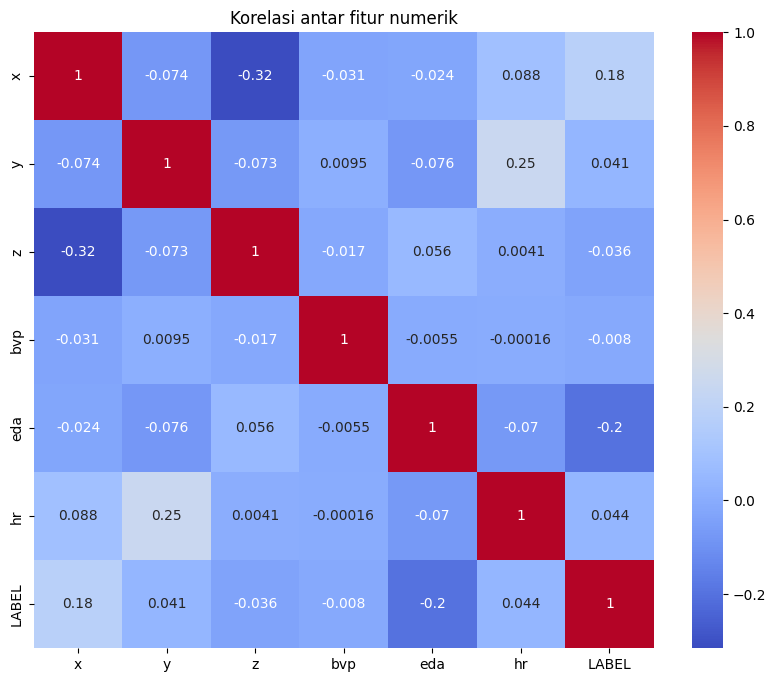

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_cleaned[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()


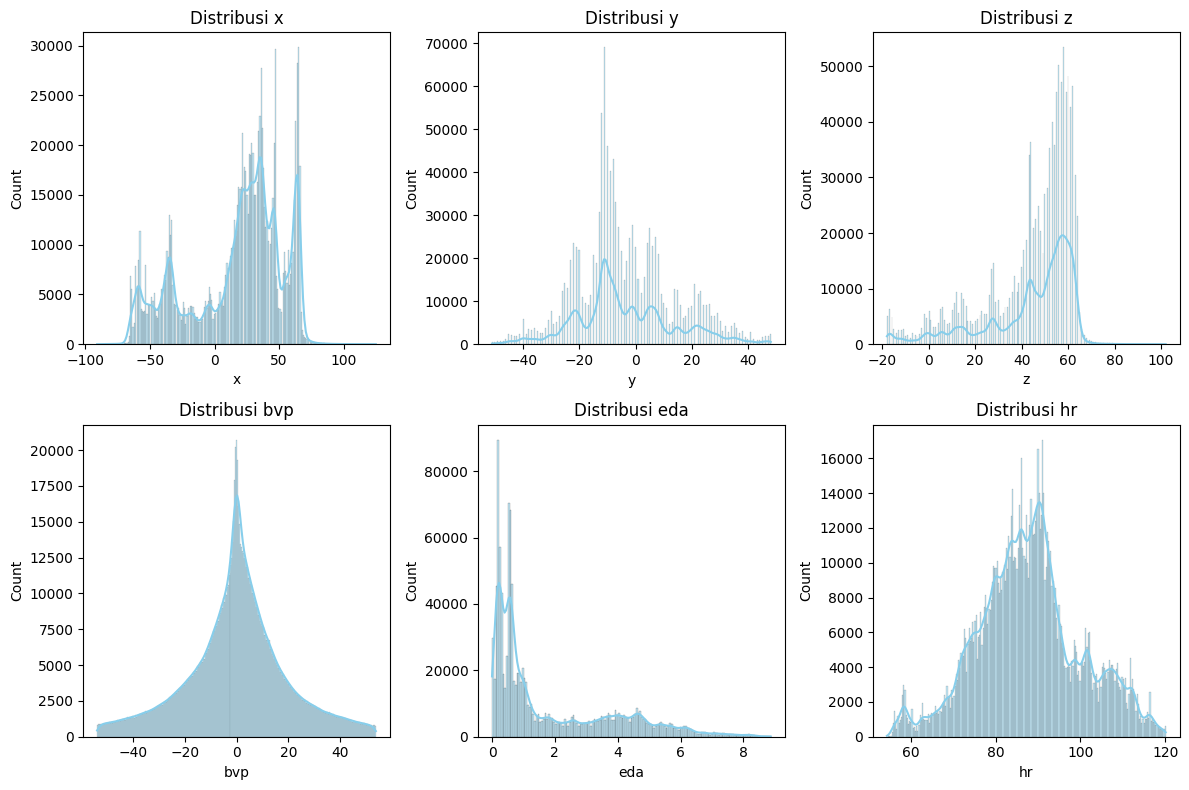

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih 6 fitur numerik teratas untuk visualisasi agar tidak terlalu padat
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns[:6]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_cleaned[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

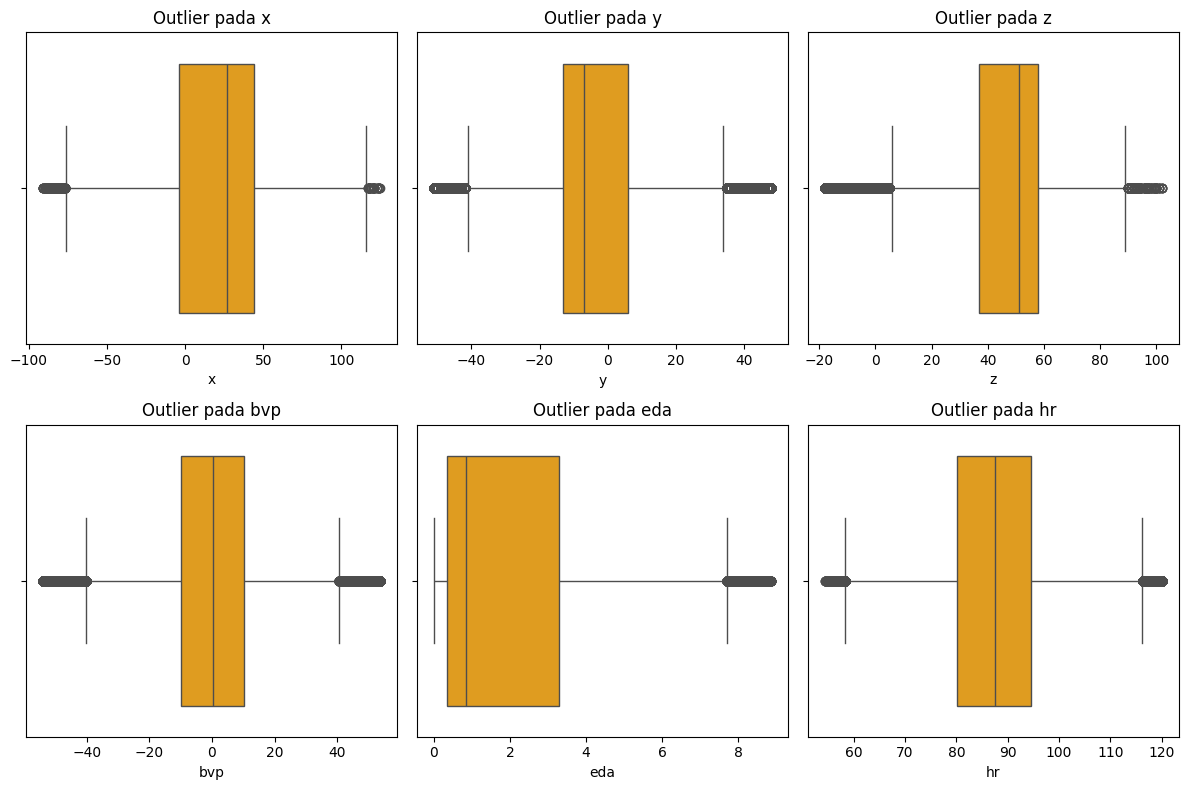

In [35]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[col], color='orange')
    plt.title(f'Outlier pada {col}')
plt.tight_layout()
plt.show()
